In [1]:
#Problem
#Company wants to automate the loan eligibility process (real time) based on customer detail 
#provided while filling online application form. 
#These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. 
#To automate this process, they have given a problem to identify the customers segments, those are eligible 
#for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

In [2]:
#Data
#Variable(Descriptions): Loan_ID(Unique Loan ID), Gender(M/F), Married, Dependents, Education (Graduate/Under Graduate),
#Self_Employed, Applicant income, CoapplicantIncome, LoanAmount (in thousands), Loan_Amount_Term (in months), 
#Credit_History(credit history meets guidelines),Property_Area (Urban/Semi Urban/Rural), Loan_Status(Y/N)

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
train = pd.read_csv("train.csv")

In [5]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
train.isnull()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


So, LoanAmount has 22 missing values.

Loan_Amount_Term has 14 missing values.

Credit_History has 50 missing values.

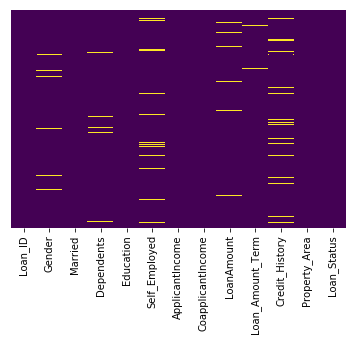

In [8]:
#Finding the locations of the missing data
sns.heatmap(train.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')
#Yellow dash represents missing points

Hence, among the non-numeric columns Gender, Dependents, Self_Employed also have missing values.

In [9]:
print(train['Gender'].isna().sum())
print(train['Dependents'].isna().sum())
print(train['Self_Employed'].isna().sum())

13
15
32


Hence, Gender has 13, Dependents has 15 and Self_Employed has 32 missing values

C:\Users\dell\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


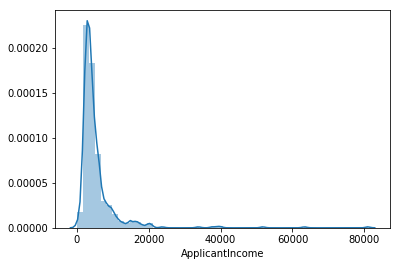

In [10]:
sns.distplot(train['ApplicantIncome'])

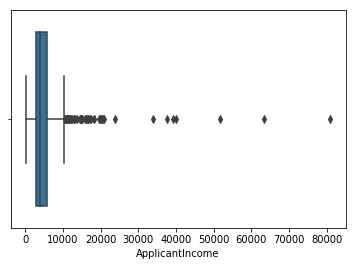

In [11]:
sns.boxplot(train['ApplicantIncome'])

Hence, there are few extreme values when it comes to the Applicant Income. But, the majority of applicants have income within 20000.

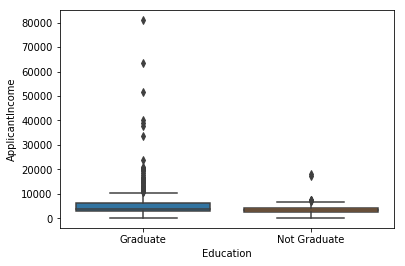

In [18]:
sns.boxplot(y='ApplicantIncome', data=train, x='Education')

Hence, there is no substantial difference between the mean income of graduates and non-graduates.

But there are many graduates with high income.

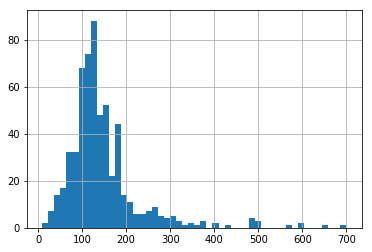

In [20]:
train['LoanAmount'].hist(bins=50)

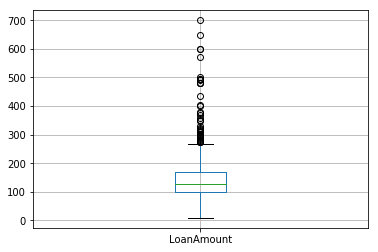

In [21]:
train.boxplot(column='LoanAmount')

Here, there are some extreme values. And LoanAmount also has some missing values. So, we need to clean the data.

In [22]:
#Frequence table for credit history
train['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [37]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

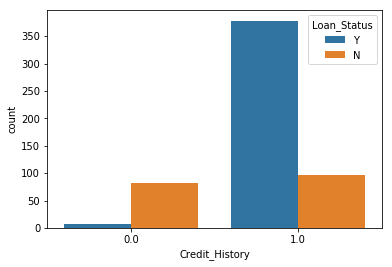

In [42]:
#Probability of getting loan by credit history
sns.countplot(x='Credit_History', hue='Loan_Status', data=train)

Hence, chances of getting a loan are eight-fold if the applicant has a valid credit history.

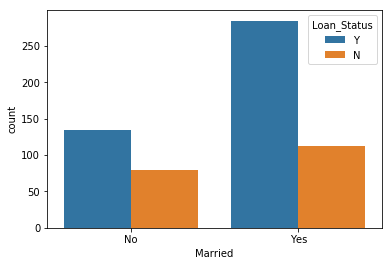

In [44]:
#Getting loan by marriage status
sns.countplot(x='Married', hue='Loan_Status', data=train)

Hence, chances of getting loan are much more if the person is married.

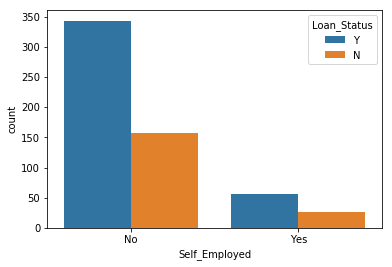

In [47]:
#Getting loan by Self-Employed status
sns.countplot(data=train, x='Self_Employed', hue='Loan_Status')

Hence, chances of getting loan are much more if the person is not self-employed

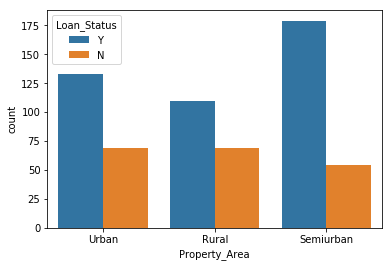

In [48]:
#Getting loan by Property_Area
sns.countplot(data=train, x='Property_Area', hue='Loan_Status')

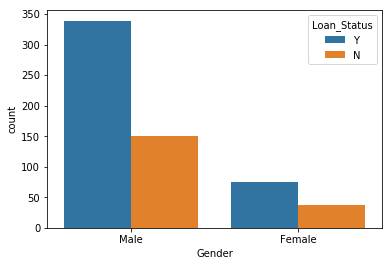

In [50]:
#Getting loan by Gender
sns.countplot(data=train, x='Gender', hue='Loan_Status')

# Data Cleaning

In [51]:
#Missing values in all columns
train.apply(lambda x: sum(x.isnull()), axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [52]:
train['Gender'].fillna(train['Gender'].mode())

0        Male
1        Male
2        Male
3        Male
4        Male
5        Male
6        Male
7        Male
8        Male
9        Male
10       Male
11       Male
12       Male
13       Male
14       Male
15       Male
16       Male
17     Female
18       Male
19       Male
20       Male
21       Male
22       Male
23        NaN
24       Male
25       Male
26       Male
27       Male
28       Male
29     Female
        ...  
584      Male
585      Male
586      Male
587    Female
588       NaN
589      Male
590      Male
591      Male
592       NaN
593      Male
594      Male
595      Male
596      Male
597      Male
598      Male
599      Male
600    Female
601      Male
602      Male
603      Male
604    Female
605      Male
606      Male
607      Male
608      Male
609    Female
610      Male
611      Male
612      Male
613    Female
Name: Gender, Length: 614, dtype: object